In [101]:
%matplotlib inline

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
nodes = ['Numpy', 'Scipy']

In [104]:
edges = [(1, 0)]

In [105]:
def edge_exists(i, j): return (i, j) in edges
assert edge_exists(1, 0)
assert not edge_exists(0, 1)

In [106]:
import numpy as np
adjacency_matrix = np.zeros((len(nodes), len(nodes)))

In [107]:
adjacency_matrix

array([[0., 0.],
       [0., 0.]])

In [108]:
for i, j in edges:
    adjacency_matrix[i][j] = 1

In [109]:
assert adjacency_matrix[1][0]
assert not adjacency_matrix[0][1]

In [110]:
adjacency_matrix

array([[0., 0.],
       [1., 0.]])

In [111]:
adjacency_matrix[0][1] = 1

In [112]:
adjacency_matrix

array([[0., 1.],
       [1., 0.]])

In [113]:
import networkx as nx

In [114]:
G = nx.DiGraph()

In [115]:
G.add_node(0)

In [116]:
nx.to_numpy_array(G)

array([[0.]])

In [117]:
G.nodes[0]['webpage'] = 'Numpy'

In [118]:
nx.to_numpy_array(G)

array([[0.]])

In [119]:
def print_node_attributes():
    for i in G.nodes:
        print(f"The attribute dictionary at node {i} is {G.nodes[i]}")

In [120]:
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'Numpy'}


In [121]:
G.add_node(1, webpage='Scipy')

In [122]:
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'Numpy'}
The attribute dictionary at node 1 is {'webpage': 'Scipy'}


In [123]:
G.nodes(data=True)

NodeDataView({0: {'webpage': 'Numpy'}, 1: {'webpage': 'Scipy'}})

In [124]:
nx.to_numpy_array(G)

array([[0., 0.],
       [0., 0.]])

In [125]:
G.add_edge(1, 0)

In [126]:
nx.to_numpy_array(G)

array([[0., 0.],
       [1., 0.]])

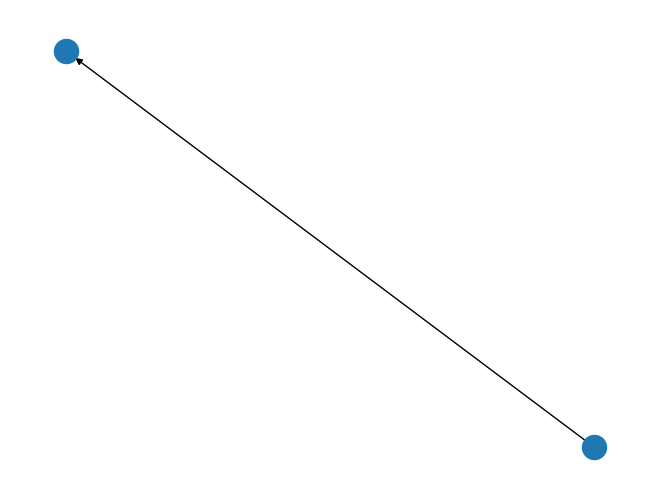

In [127]:
np.random.seed(0)
nx.draw(G)

In [128]:
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}

In [129]:
labels

{0: 'Numpy', 1: 'Scipy'}

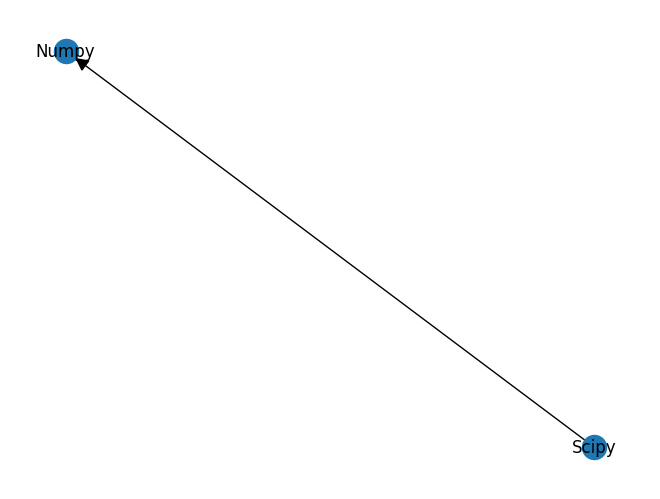

In [130]:
np.random.seed(0)
nx.draw(G, labels=labels, arrowsize=20, arrows=True)

In [131]:
nx.to_numpy_array(G)

array([[0., 0.],
       [1., 0.]])

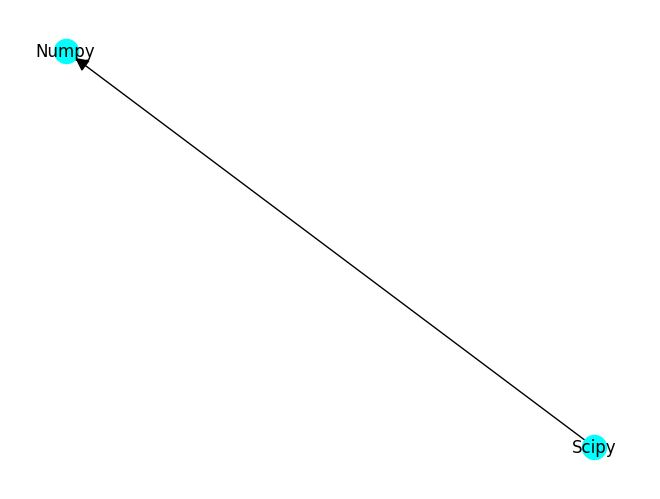

In [132]:
np.random.seed(0)
nx.draw(G, labels=labels, arrowsize=20, node_color='cyan')

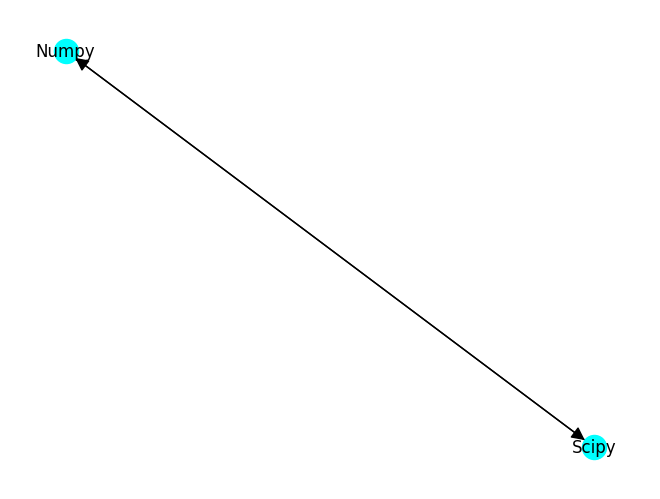

In [133]:
G.add_edge(0, 1)
np.random.seed(0)
nx.draw(G, labels=labels, arrowsize=20, node_color='cyan')

In [134]:
webpages = ['Pandas', 'Matplotlib']

In [135]:
new_nodes = [(i, {'webpage': webpage}) for i, webpage in enumerate(webpages, 2)]

In [136]:
new_nodes

[(2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]

In [137]:
G.add_nodes_from(new_nodes)

In [138]:
G.nodes(data=True)

NodeDataView({0: {'webpage': 'Numpy'}, 1: {'webpage': 'Scipy'}, 2: {'webpage': 'Pandas'}, 3: {'webpage': 'Matplotlib'}})

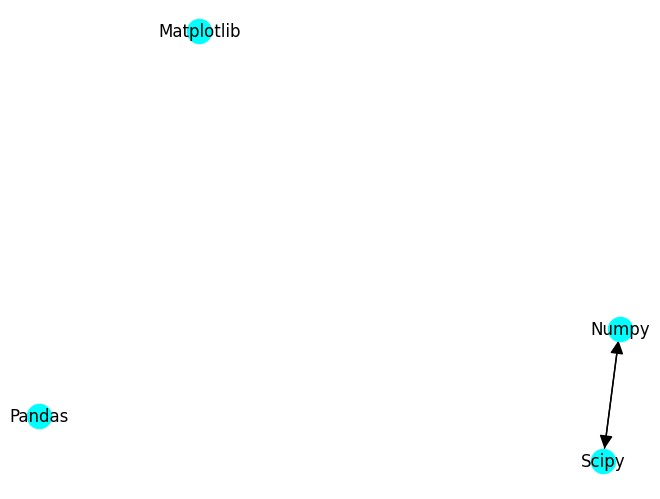

In [139]:
np.random.seed(0)
labels = {i: G.nodes[i]['webpage'] for i in G.nodes}
nx.draw(G, labels=labels, arrowsize=20, node_color='cyan')

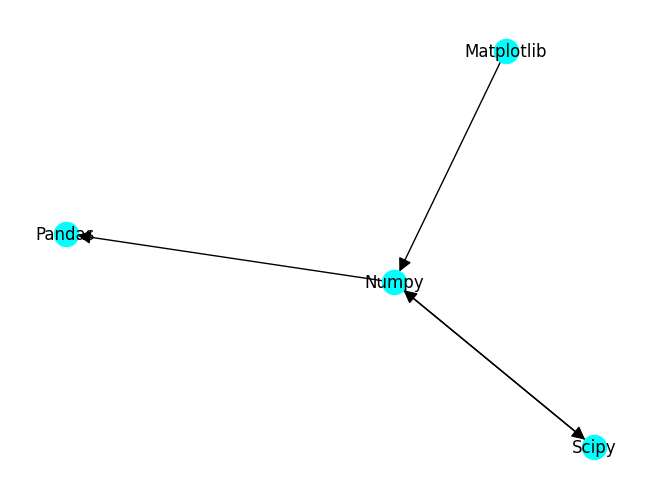

In [140]:
G.add_edges_from([(0,2), (3, 0)])
np.random.seed(0)
nx.draw(G, labels=labels, arrowsize=20, node_color='cyan')

In [141]:
nx.to_numpy_array(G)

array([[0., 1., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [142]:
adjacency_matrix = nx.to_numpy_array(G)

In [143]:
adjacency_matrix.sum(axis=0)

array([2., 1., 1., 0.])

In [144]:
in_degrees = adjacency_matrix.sum(axis=0)
for i, in_degree in enumerate(in_degrees):
    page = G.nodes[i]['webpage']
    print(f"{page} has an in-degree of {in_degree}")
top_page = G.nodes[in_degrees.argmax()]['webpage']
print(f"\n{top_page} is the most popular page.")

Numpy has an in-degree of 2.0
Scipy has an in-degree of 1.0
Pandas has an in-degree of 1.0
Matplotlib has an in-degree of 0.0

Numpy is the most popular page.


In [145]:
assert G.in_degree(0) == 2

In [146]:
G2 = nx.DiGraph()
G2.add_nodes_from(['NumPy', 'SciPy', 'Matplotlib', 'Pandas'])
G2.add_edges_from([('SciPy', 'NumPy'), ('SciPy', 'NumPy'), ('NumPy', 'Pandas'), ('Matplotlib', 'NumPy')])

In [147]:
G2.nodes(data=True)

NodeDataView({'NumPy': {}, 'SciPy': {}, 'Matplotlib': {}, 'Pandas': {}})

In [148]:
assert G2.in_degree('NumPy') == 2

In [149]:
G = nx.Graph()

In [150]:
G.add_edge(0, 1)

In [151]:
nx.to_numpy_array(G)

array([[0., 1.],
       [1., 0.]])

In [152]:
G[0][1]['travel_time'] = 20

In [153]:
for i, j in [(0, 1), (1, 0)]:
    travel_time = G[i][j]['travel_time']
    print(f"It takes {travel_time} minutes to drive from Town {i} to Town {j}.")

It takes 20 minutes to drive from Town 0 to Town 1.
It takes 20 minutes to drive from Town 1 to Town 0.


In [154]:
G.add_edge(1, 2, travel_time=15)

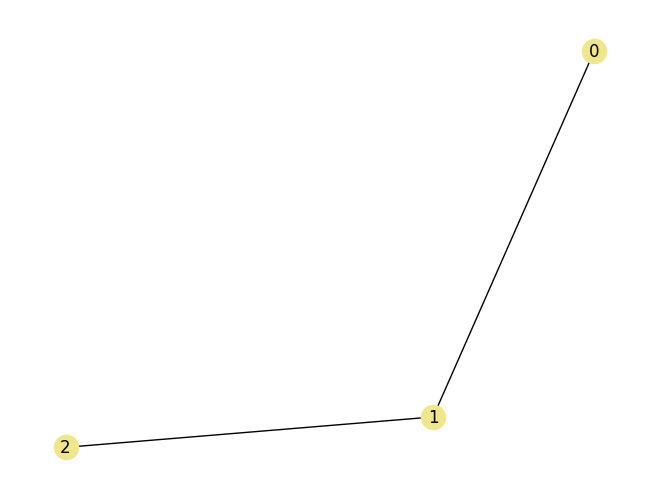

In [155]:
np.random.seed(0)
nx.draw(G, with_labels=True, node_color='khaki')

In [156]:
travel_time = sum(G[i][1]['travel_time'] for i in [0, 2])
print(f"It takes {travel_time} minutes to drive from Town 0 to Town 2.")

It takes 35 minutes to drive from Town 0 to Town 2.


In [157]:
G = nx.Graph()

In [158]:
G.add_nodes_from([(i, {'county_id': 0}) for i in range(5)])

In [159]:
G.nodes(data=True)

NodeDataView({0: {'county_id': 0}, 1: {'county_id': 0}, 2: {'county_id': 0}, 3: {'county_id': 0}, 4: {'county_id': 0}})

In [160]:
def add_random_edge(G, node1, node2,prob_road=.9, mean_drive_time=20):
    if np.random.binomial(1, prob_road):
        drive_time = np.random.normal(mean_drive_time)
        G.add_edge(node1, node2, travel_time=round(drive_time, 2))
nodes = list(G.nodes)

In [161]:
np.random.seed(0)
for n1 in nodes[:-1]:
    for n2 in nodes[n1+1:]:
        add_random_edge(G, n1, n2)

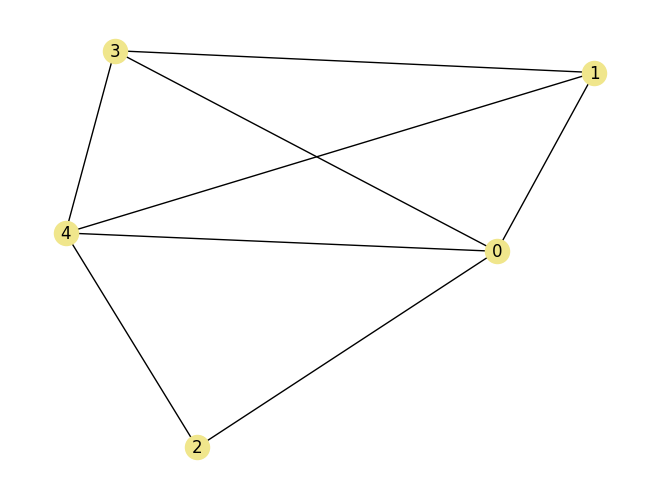

In [162]:
nx.draw(G, with_labels=True, node_color='khaki')

In [163]:
def random_county(county_id):
    new_towns = np.random.randint(3, 10)
    G = nx.Graph()
    nodes = [(node_id, {'county_id': county_id}) for node_id in range(new_towns)]
    G.add_nodes_from(nodes)
    for node1, _ in nodes[:-1]:
        for node2, _ in nodes[node1 + 1:]:
            add_random_edge(G, node1, node2)
    return G

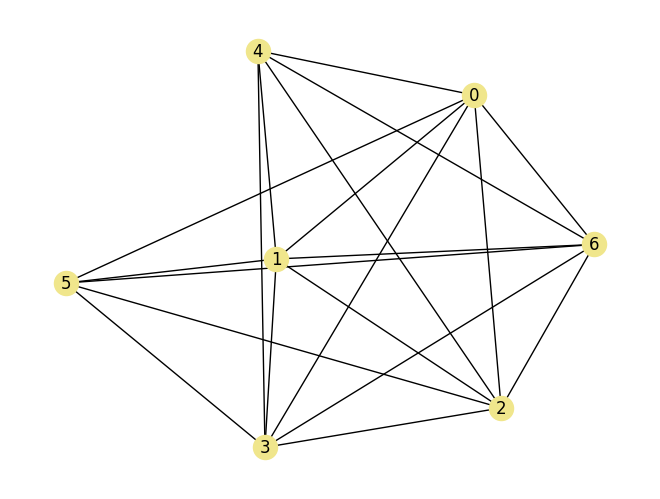

In [164]:
np.random.seed(0)
G2 = random_county(1)
nx.draw(G2, with_labels=True, node_color='khaki')

In [165]:
np.random.seed(0)
G = nx.disjoint_union(G, G2)

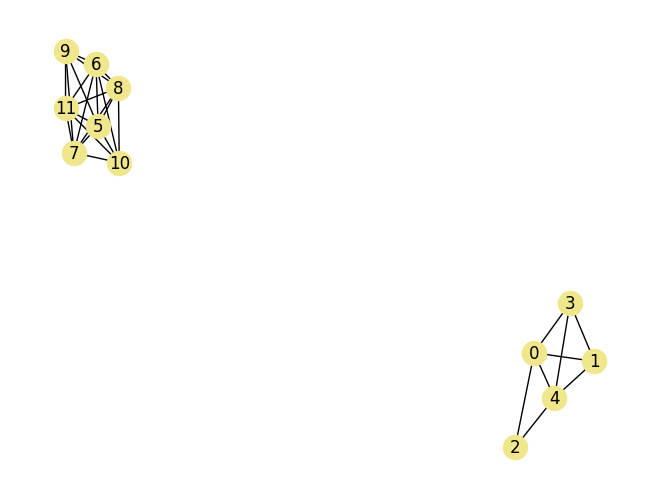

In [166]:
nx.draw(G, with_labels=True, node_color='khaki')

In [167]:
def add_intercounty_edges(G):
    nodes = list(G.nodes(data=True))
    for node1, attributes1 in nodes[:-1]:
        county1 = attributes1['county_id']
        for node2, attributes2 in nodes[node1:]:
            if county1 != attributes2['county_id']:
                add_random_edge(G, node1, node2, prob_road=0.05, mean_drive_time=45)
    return G

In [168]:
np.random.seed(0)
G = add_intercounty_edges(G)

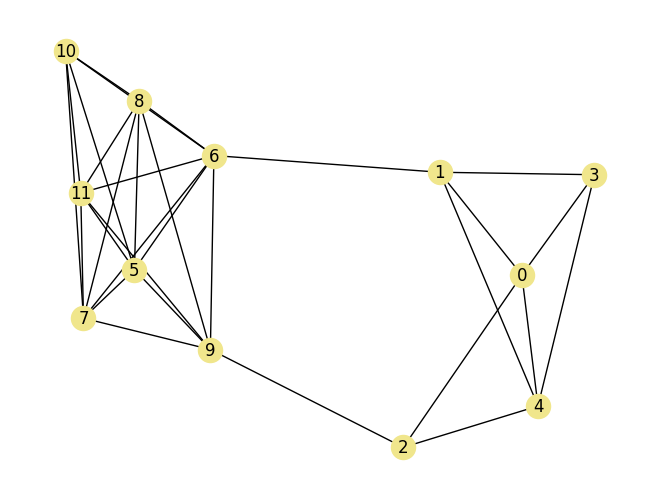

In [169]:
np.random.seed(0)
nx.draw(G, with_labels=True, node_color='khaki')

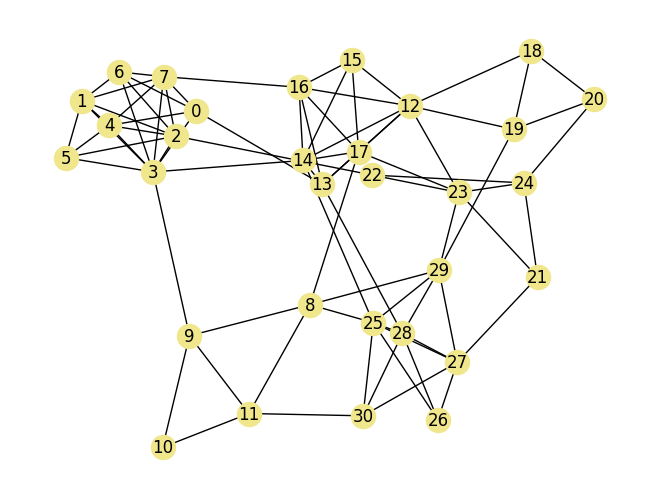

In [170]:
np.random.seed(1)
G = random_county(0)
for county_id in range(1, 6):
    G2 = random_county(county_id)
    G = nx.disjoint_union(G, G2)
G = add_intercounty_edges(G)
np.random.seed(1)
nx.draw(G, with_labels=True, node_color='khaki')

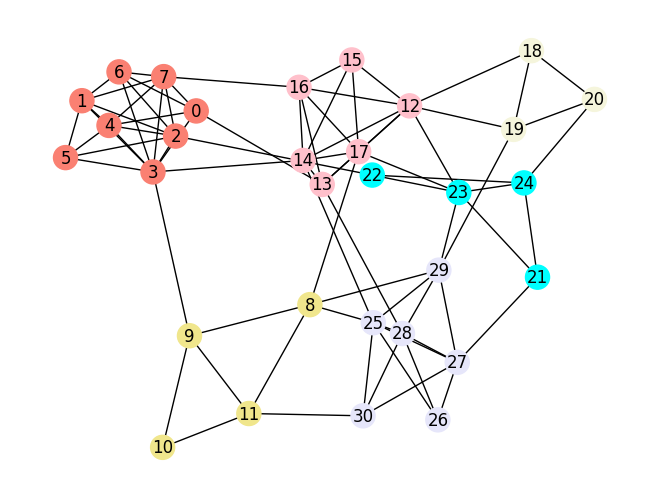

In [171]:
np.random.seed(1)
county_colors = ['salmon', 'khaki', 'pink', 'beige', 'cyan', 'lavender']
county_ids = [G.nodes[n]['county_id'] for n in G.nodes]
node_colors = [county_colors[id_] for id_ in county_ids]
nx.draw(G, with_labels=True, node_color=node_colors)

In [172]:
neighbors = list(G.neighbors(0))

In [173]:
assert list(neighbors) == list(G[0])

In [174]:
neighbors

[3, 4, 6, 7, 13]

In [175]:
time_to_neighbor = {n: G[0][n]['travel_time'] for n in neighbors}

In [176]:
time_to_neighbor

{3: 18.4, 4: 18.52, 6: 20.26, 7: 18.04, 13: 44.75}

In [177]:
fastest_times = {0: 0}

In [178]:
fastest_times.update(time_to_neighbor)

In [179]:
fastest_times

{0: 0, 3: 18.4, 4: 18.52, 6: 20.26, 7: 18.04, 13: 44.75}

In [180]:
time_to_neighbor = {n: G[0][n]['travel_time'] for n in neighbors}
fastest_times.update(time_to_neighbor)
for neighbor, travel_time in sorted(time_to_neighbor.items(), key=lambda x: x[1]):
    print(f"It takes {travel_time} minutes to drive from Town 0 to Town " f"{neighbor}.")

It takes 18.04 minutes to drive from Town 0 to Town 7.
It takes 18.4 minutes to drive from Town 0 to Town 3.
It takes 18.52 minutes to drive from Town 0 to Town 4.
It takes 20.26 minutes to drive from Town 0 to Town 6.
It takes 44.75 minutes to drive from Town 0 to Town 13.


In [181]:
def examine_detour(town_id):
    detour_found = False
    travel_time = fastest_times[town_id]
    for n in G[town_id]:
        detour_time = travel_time + G[town_id][n]['travel_time']
        if n in fastest_times:
            if detour_time < fastest_times[n]:
                detour_found = True
                print(
                f"A detour through Town {town_id} reduces "
                f"travel-time to Town {n} from "
                f"{fastest_times[n]:.2f} to "
                f"{detour_time:.2f} minutes."
                )
                fastest_times[n] = detour_time
        else:
            fastest_times[n] = detour_time
    return detour_found


In [182]:
if not examine_detour(7):
    print("No detours were found")
added_towns = len(fastest_times) - 6
print(f"We've computed travel-times to {added_towns} additional towns.")

No detours were found
We've computed travel-times to 3 additional towns.


In [183]:
candidate_pool = set(G[0]) | set(G[7])

In [184]:
candidate_pool

{0, 1, 2, 3, 4, 6, 7, 13, 16}

In [185]:
examined_towns = {0, 7}
unexamined_towns = candidate_pool - examined_towns

In [186]:
detour_candidate = min(unexamined_towns, key=lambda x: fastest_times[x])

In [187]:
travel_time = fastest_times[detour_candidate]

In [188]:
print(f"Our next detour candidate is Town {detour_candidate}, "
f"which is located {travel_time} minutes from Town 0.")

Our next detour candidate is Town 3, which is located 18.4 minutes from Town 0.


In [189]:
if not examine_detour(detour_candidate):
    print("No detours were found.")

No detours were found.


In [190]:
def new_neighbors(town_id):
    return set(G[town_id]) - examined_towns

In [191]:
def shift_to_examined(town_id):
    unexamined_towns.remove(town_id)
    examined_towns.add(town_id)

In [192]:
unexamined_towns.update(new_neighbors(detour_candidate))
shift_to_examined(detour_candidate)
num_candidates = len(unexamined_towns)
print(f"{num_candidates} detour candidates remain.")

9 detour candidates remain.


In [193]:
while unexamined_towns:
    detour_candidate = min(unexamined_towns, key=lambda x: fastest_times[x])
    examine_detour(detour_candidate)
    shift_to_examined(detour_candidate)
    unexamined_towns.update(new_neighbors(detour_candidate))

A detour through Town 14 reduces travel-time to Town 15 from 83.25 to 82.27 minutes.
A detour through Town 22 reduces travel-time to Town 23 from 111.21 to 102.38 minutes.
A detour through Town 28 reduces travel-time to Town 29 from 127.60 to 108.46 minutes.
A detour through Town 28 reduces travel-time to Town 30 from 126.46 to 109.61 minutes.
A detour through Town 19 reduces travel-time to Town 20 from 148.03 to 131.23 minutes.


In [194]:
shortest_lengths = nx.shortest_path_length(G, weight='travel_time', source=0)

In [195]:
shortest_lengths

{0: 0,
 7: 18.04,
 3: 18.4,
 4: 18.52,
 6: 20.26,
 5: 37.129999999999995,
 2: 37.61,
 1: 38.230000000000004,
 13: 44.75,
 9: 61.339999999999996,
 16: 62.93,
 14: 63.67,
 12: 66.51,
 17: 66.94,
 11: 80.91,
 8: 81.53,
 10: 81.69,
 22: 82.25999999999999,
 15: 82.27000000000001,
 28: 89.85,
 23: 102.38,
 24: 103.38999999999999,
 29: 108.46,
 25: 108.68,
 26: 108.86,
 27: 109.44,
 30: 109.61,
 19: 111.14000000000001,
 18: 112.62,
 21: 122.58,
 20: 131.23000000000002}

In [196]:
for town, path_length in shortest_lengths.items():
    assert path_length == fastest_times[town]

In [197]:
shortest_path = nx.shortest_path(G, weight='travel_time', source=0)[30]

In [198]:
shortest_path

[0, 13, 28, 30]

In [199]:
travel_time = 0

In [200]:
for town_a, town_b in zip(shortest_path[:-1], shortest_path[1:]):
    travel_time += G[town_a][town_b]['travel_time']
print("The fastest travel time between Town 0 and Town 30 is " f"{travel_time} minutes.")
assert travel_time == fastest_times[30]

The fastest travel time between Town 0 and Town 30 is 109.61 minutes.


In [201]:
import pickle

In [203]:
with open('session_18_graph.pickle', 'wb') as f:
    pickle.dump(G, f)